Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


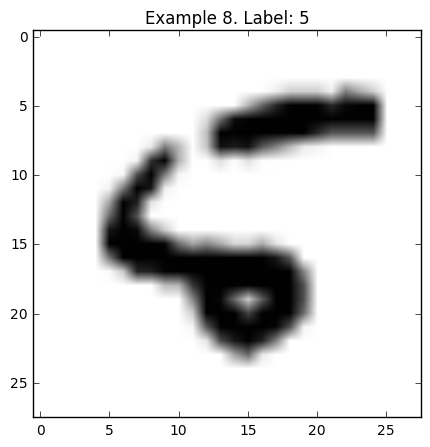

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_master': '', 'keep_checkpoint_every_n_hours': 10000, 'save_checkpoints_steps': None, '_task_id': 0, 'save_summary_steps': 100, 'save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_environment': 'local', '_evaluation_master': '', 'tf_random_seed': None, '_is_chief': True, 'keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x128adf898>, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_si

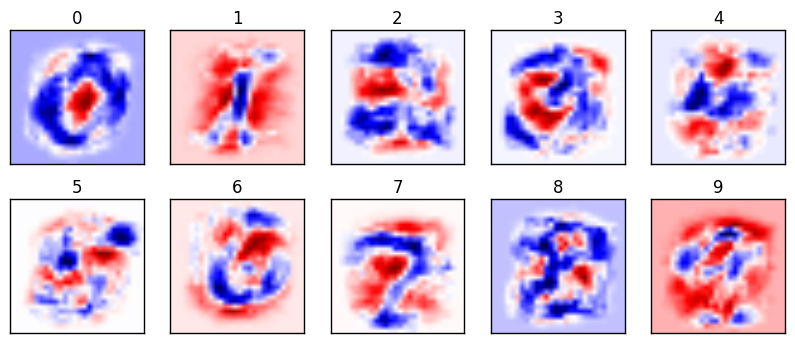

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (5, 5)

import tensorflow as tf
learn = tf.contrib.learn

mnist = learn.datasets.load_dataset("mnist")
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype = np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype = np.int32)

max_examples = 1000
data = data[:max_examples]
labels = labels[:max_examples]

def display(idx):
    img = test_data[idx]
    plt.title("Example %d. Label: %d" % (idx, test_labels[idx]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)
    plt.show()

display(8)

feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns = feature_columns, n_classes = 10)
classifier.fit(data, labels, batch_size = 100, steps=100)

print("Accuracy is ", classifier.evaluate(test_data, test_labels)["accuracy"], "\n\n")

for idx in range(10):
    print(classifier.predict(test_data[idx]), test_labels[idx])

weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize = (10,4))
axes = axes.reshape(-1)
for idx in range(len(axes)):
    a = axes[idx]
    a.imshow(weights.T[idx].reshape(28,28), cmap=plt.cm.seismic_r)
    a.set_title(idx)
    a.set_xticks(())
    a.set_yticks(())
plt.show()



In [91]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=10)]

classifier = learn.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[512, 256, 64],
    n_classes=10,
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1),
                                )

classifier.fit(data, labels, steps=2000, batch_size=100)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_master': '', 'keep_checkpoint_every_n_hours': 10000, 'save_checkpoints_steps': None, '_task_id': 0, 'save_summary_steps': 100, 'save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_environment': 'local', '_evaluation_master': '', 'tf_random_seed': None, '_is_chief': True, 'keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11fefc7f0>, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_si

In [92]:
classifier.evaluate(x=test_data, y=test_labels)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Summary name dnn/hiddenlayer_0:fraction_of_zero_values is illegal; using

{'accuracy': 0.88510001, 'global_step': 2000, 'loss': 0.54342508}

In [93]:
def examine_by_hand(top_N):
    print(list(classifier.predict(test_data[:top_N], as_iterable=True)), test_labels[:top_N])
    
examine_by_hand(10)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Summary name dnn/hiddenlayer_0:fraction_of_zero_values is illegal; using